In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from lifelines import *
pd.set_option('display.max_columns', None)

Written by Dora Szabo https://github.com/szaboodoora/ 
This tutorial is intended to showcase some useful features of the lifelines package: https://lifelines.readthedocs.io/en/latest/

First let's load some uncensored data!

In [2]:
bird_data=pd.read_csv("https://raw.githubusercontent.com/budapestpy-workshops/workshops/master/12_online_survival/birds_surv_no_cens.csv")
bird_data

,bird_id,species,start,end,duration,event
0,1,blue,0,90,90,1
1,2,blue,0,60,60,1
2,3,red,0,60,60,1
3,4,red,0,45,45,1
4,5,red,0,45,45,1
5,6,blue,0,50,50,1
6,7,red,0,50,50,1
7,8,red,0,60,60,1
8,9,blue,0,90,90,1
9,10,red,0,90,90,1


Inspect the data

In [3]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(bird_data['end'],bird_data['event'], bird_data['start'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,0,0,0,10,10
45,2,2,0,0,10
50,2,2,0,0,8
60,3,3,0,0,6
90,3,3,0,0,3


Have a look at it in a more visual form, too. Full circles correspond to events, separate lines mean separate trials/subject

# from lifelines.plotting import plot_lifetimes


plot_lifetimes(
    bird_data['end'] - bird_data['start'],
    event_observed=bird_data['event'],
    entry=bird_data['start'],
    event_observed_color="#383838",
    left_truncated=False,
)
plt.ylabel("Bird ID")
plt.xlabel("Days of observation")

The Kaplan Meier estimator (estimating the survival function) uses exactly these data to estimate the survival curves! In this example, all subjects died by the end of the observation period so the value on the y axis (corresponding to proportion of subjects still alive) dropped to 0 by the end.

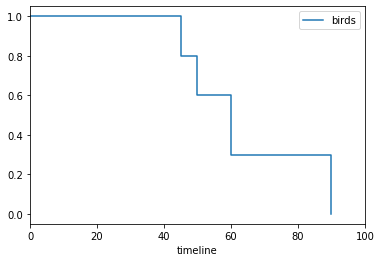

In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter() 
kmf.fit(bird_data['end'], bird_data['event'], label='birds')
kmf.survival_function_
kmf.cumulative_density_

kmf.plot_survival_function(ci_show=False, xlim=(0,100)) # or just kmf.plot()


Let's have a look at a slightly modified dataset. Here, some data points are right censored. This means that in these cases the event of interest did not take place til the end of the observation period.


In [6]:
bird_data1=pd.read_csv("https://raw.githubusercontent.com/budapestpy-workshops/workshops/master/12_online_survival/birds_surv_R_cens.csv")
bird_data1

,bird_id,species,start,end,duration,event
0,1,blue,0,90,90,1
1,2,blue,0,60,60,0
2,3,red,0,60,60,1
3,4,red,0,45,45,1
4,5,red,0,45,45,0
5,6,blue,0,50,50,1
6,7,red,0,50,50,1
7,8,red,0,60,60,1
8,9,blue,0,90,90,0
9,10,blue,0,40,40,0


Here, there is no circle marker for the censored data points and they are marked with a different colour.

Text(0.5, 0, 'Days of observation')

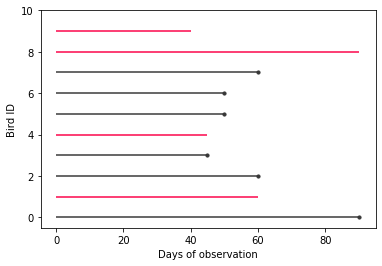

In [7]:
from lifelines.plotting import plot_lifetimes


plot_lifetimes(
    bird_data1['end'] - bird_data1['start'],
    event_observed=bird_data1['event'],
    entry=bird_data1['start'],
    event_observed_color="#383838",
    event_censored_color="#fc0349",
    left_truncated=False,
)
plt.ylabel("Bird ID")
plt.xlabel("Days of observation")

Can you guess what will be the proportion of subjects still alive at the end? 

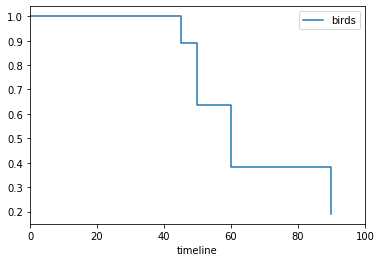

In [8]:
kmf.fit(bird_data1['end'], bird_data1['event'], label='birds')
kmf.survival_function_
kmf.cumulative_density_

kmf.plot_survival_function(ci_show=False, xlim=(0,100)) # or just kmf.plot()

<img src="image.png">

In [9]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(bird_data1['end'],bird_data1['event'], bird_data1['start'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,0,0,0,10,10
40,1,0,1,0,10
45,2,1,1,0,9
50,2,2,0,0,7
60,3,2,1,0,5
90,2,1,1,0,2


Left and right censored data

In [10]:
bird_data2=pd.read_csv("https://raw.githubusercontent.com/budapestpy-workshops/workshops/master/12_online_survival/birds_surv_LR_cens.csv")
bird_data2

,bird_id,species,start,end,duration,event
0,1,blue,0,90,90,1
1,2,blue,0,60,60,0
2,3,red,15,60,45,1
3,4,red,0,45,45,1
4,5,red,15,45,30,0
5,6,blue,3,50,47,0
6,7,red,0,50,50,1
7,8,red,10,60,50,1
8,9,blue,0,90,90,0
9,10,red,40,90,90,0


In [11]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(bird_data2['end'],bird_data2['event'], bird_data2['start'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,0,0,0,5,5
3,0,0,0,1,6
10,0,0,0,1,7
15,0,0,0,2,9
40,0,0,0,1,10
45,2,1,1,0,10
50,2,1,1,0,8
60,3,2,1,0,6
90,3,1,2,0,3


Text(0.5, 0, 'Days of observation')

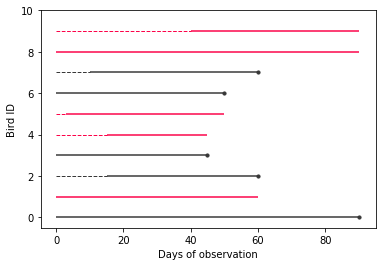

In [12]:
from lifelines.plotting import plot_lifetimes


plot_lifetimes(
    bird_data2['end'] - bird_data2['start'],
    event_observed=bird_data2['event'],
    entry=bird_data2['start'],
    event_observed_color="#383838",
    event_censored_color="#fc0349",
    left_truncated=True,
)
plt.ylabel("Bird ID")
plt.xlabel("Days of observation")

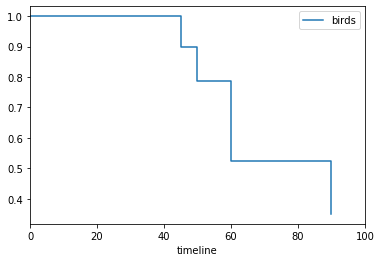

In [13]:
kmf.fit(bird_data2['end'], bird_data2['event'], label='birds')
kmf.survival_function_
kmf.cumulative_density_

kmf.plot_survival_function(ci_show=False, xlim=(0,100)) # or just kmf.plot()

Beware, the package plots the cases by index, which can result in some unexpected outputs (although the KM curve is calcualated correctly):

In [16]:
bird_data_dropped=bird_data.drop(bird_data.index[[2,4,6,8]])

In [17]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(bird_data_dropped['end'],bird_data_dropped['event'], bird_data_dropped['start'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,0,0,0,6,6
45,1,1,0,0,6
50,1,1,0,0,5
60,2,2,0,0,4
90,2,2,0,0,2


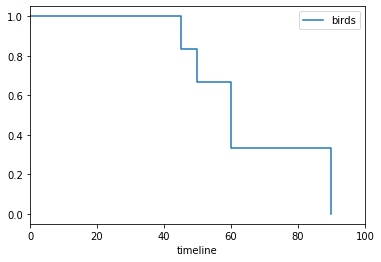

In [18]:
kmf.fit(bird_data_dropped['end'], bird_data_dropped['event'], label='birds')
kmf.survival_function_
kmf.cumulative_density_

kmf.plot_survival_function(ci_show=False, xlim=(0,100)) # or just kmf.plot()

D:\Anaconda\lib\site-packages\pandas\core\series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Text(0.5, 0, 'Days of observation')

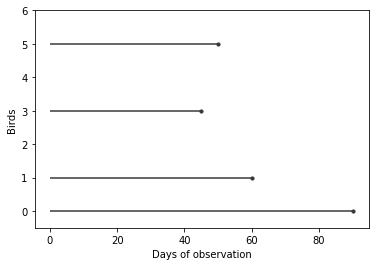

In [19]:
from lifelines.plotting import plot_lifetimes


plot_lifetimes(
    bird_data_dropped['end'] - bird_data_dropped['start'],
    event_observed=bird_data_dropped['event'],
    entry=bird_data_dropped['start'],
    event_observed_color="#383838",
    event_censored_color="#fc0349",
    left_truncated=False,
)
plt.ylabel("Birds")
plt.xlabel("Days of observation")

Here is a bit bigger fabricated dataset to have a look at how to compare different groups and different estimators:

In [22]:
dog_data=pd.read_csv("https://raw.githubusercontent.com/budapestpy-workshops/workshops/master/12_online_survival/reaction.csv")
dog_data.head()

,Dog_ID,Experimenter,Age,Age_group,Sex,Trial,Sound_ID,Sound_Category,Reaction_time,React
0,Dog013,Exp1,5.0,1,1,5,negSTIM1,2,500,1
1,Dog028,Exp1,3.0,1,2,3,neuSTIM2,3,500,1
2,Dog030,Exp2,14.7,2,2,4,posSTIM2,1,700,1
3,Dog028,Exp1,3.0,1,2,4,negSTIM1,2,800,1
4,Dog018,Exp1,12.0,2,1,4,posSTIM1,1,900,1


In [23]:
T_dog = dog_data['Reaction_time']     ## time to event
E_dog = dog_data['React']  

In [24]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(T_dog, E_dog)
table.head()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,217,217
280.0,1,1,0,0,217
300.0,1,1,0,0,216
340.0,1,1,0,0,215
390.0,1,1,0,0,214


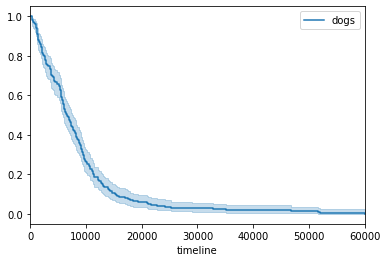

In [25]:
#ci_show=True is the default for the plot functions, so it shows the confidence intervals by default
kmf.fit(T_dog, E_dog, label='dogs')
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function() # or just kmf.plot()

The Weidbull estimator is one alternative to the Kaplan Meier estimator (there are many more), while KM is doing step-wise estimation, W is smoothed

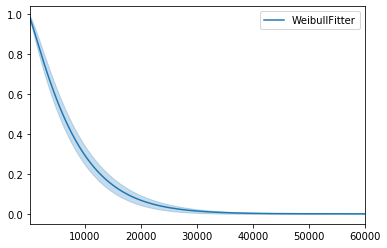

In [26]:
wbf = WeibullFitter().fit(T_dog, E_dog, label='WeibullFitter')
wbf.plot_survival_function()

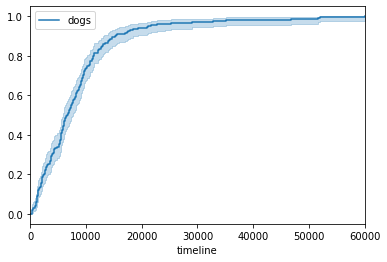

In [27]:
#the cumulative density is the inverse of the survival curve
kmf.plot_cumulative_density()

Text(0.5, 1.0, 'Reaction times toward different sound stimuli')

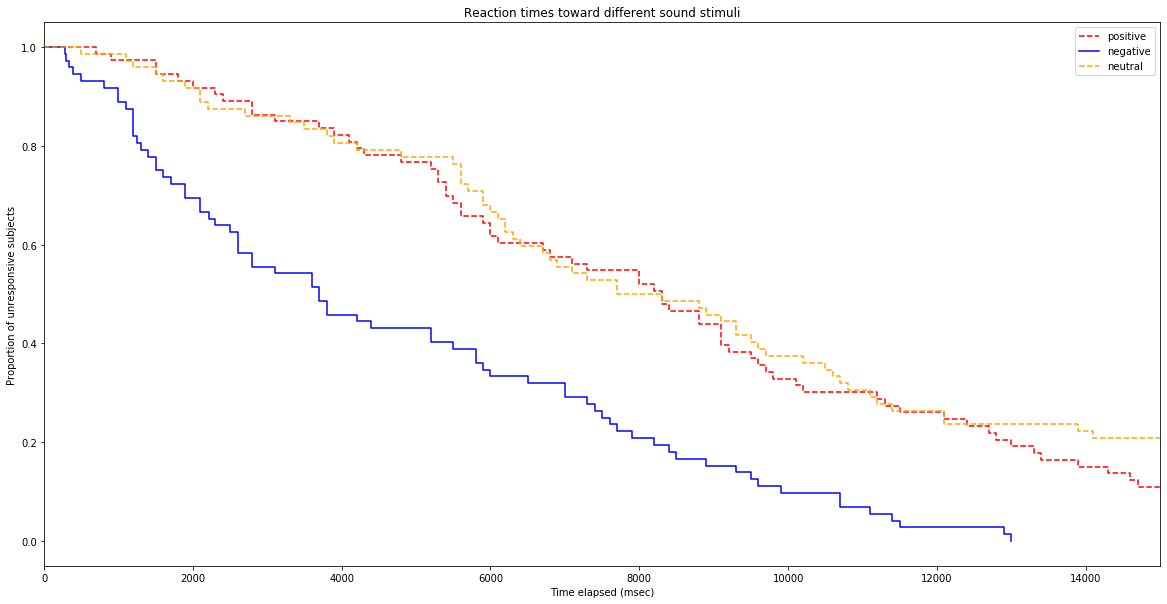

In [28]:

kmf = KaplanMeierFitter() 



T = T_dog   ## time to event
E = E_dog      ## event occurred or censored

## Create the cohorts from the 'Contract' column
ix1 = (dog_data['Sound_Category'] == 1)   ## Cohort 1C
ix2 = (dog_data['Sound_Category'] == 2)         ## Cohort 2
ix3 = (dog_data['Sound_Category'] == 3)         ## Cohort 3


plt.figure(figsize=(20,10))


kmf.fit(T[ix1], E[ix1], label='positive')    ## fit the cohort 1 data
ax = kmf.plot(linestyle='--', color='red', ci_show=False)


kmf.fit(T[ix2], E[ix2], label='negative')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linestyle='-', color='blue',ci_show=False)

kmf.fit(T[ix3], E[ix3], label='neutral') 
ax1 = kmf.plot(ax=ax,linestyle='--', color='orange', ci_show=False)

plt.xlim((0, 15000))

plt.ylabel('Proportion of unresponsive subjects')
plt.xlabel('Time elapsed (msec)')
plt.title('Reaction times toward different sound stimuli')


In [30]:
#Cox's prportional hazard model
cph=CoxPHFitter()
dog_model=dog_data[['Reaction_time', 'React', 'Sound_Category', 'Age_group']].copy()
dog_model=dog_model[dog_model['Sound_Category']!=3]
cph.fit(dog_model, 'Reaction_time', 'React')
cph.print_summary() 